# **Part 1: Theoretical Understanding**


**Basics of Symbiotic**
1. <u>*Symbiotic.fi*</u> is a platform that democratize economic security by creating a permissionless marketplace where networks can rent security and stakers can optimize returns through cross-network restaking. Its flexibility and asset-agnostic design position it as a foundational layer for shared security in a multi-chain ecosystem.

2. <u>*DefaultCollateral*</u> is the backbone of Symbiotic’s shared security model, enabling stakers to deposit assets, earn rewards, and manage risks while providing networks with on-demand economic security.

**Deposit Function**

The deposit function allows users to lock collateral (e.g., ERC20 tokens or ETH) into the DefaultCollateral contract. In exchange, the protocol mints receipt tokens (ERC20) representing the user’s stake. These tokens track the user’s share of the pooled collateral and are used to claim assets during withdrawal.
It lets the user wrap an underlying ERC‑20 asset into a collateral token (a DefaultCollateral token). In exchange for depositing the underlying asset, the user receives an equivalent amount of a collateralized ERC‑20 token 


<u>*Functioning of deposit*</u>

2. Input Token: The token accepted for deposits (e.g., DAI, ETH, or other ERC20 tokens).
- a. The function is called with two main parameters: the recipient address and the amount of the underlying asset to deposit.
- b. It first records the current balance of the underlying asset held by the collateral contract (using IERC20(asset).balanceOf(address(this))). This before balance is used to determine the net amount that was transferred.


3. Token Transfer:
- The function then calls a safe transfer method—specifically, it uses a helper function (named here transferFrom2) that wraps a standard ERC‑20 transferFrom call and provides a fallback mechanism (for example, via Permit2) if the token does not fully comply with the ERC‑20 standard.
- After the transfer, the contract checks its new balance and calculates the actual amount received by subtracting the before balance from the current balance.
- If the computed amount is zero (for instance, if no tokens were transferred), the function reverts with an “InsufficientDeposit” error.

4. Minting the Collateral Token (Output Token): Receipt tokens (e.g., sDAI for DAI deposits), which are ERC20 tokens minted 1:1 to the deposited amount (minus potential fees).
- Once the underlying asset is successfully transferred, the contract mints a corresponding amount of the collateral token to the recipient. In effect, the user’s deposit is now represented by their holding of this new token.
- The internal balance tracking (as part of the ERC‑20 storage) is updated, and an event is emitted to record the deposit.



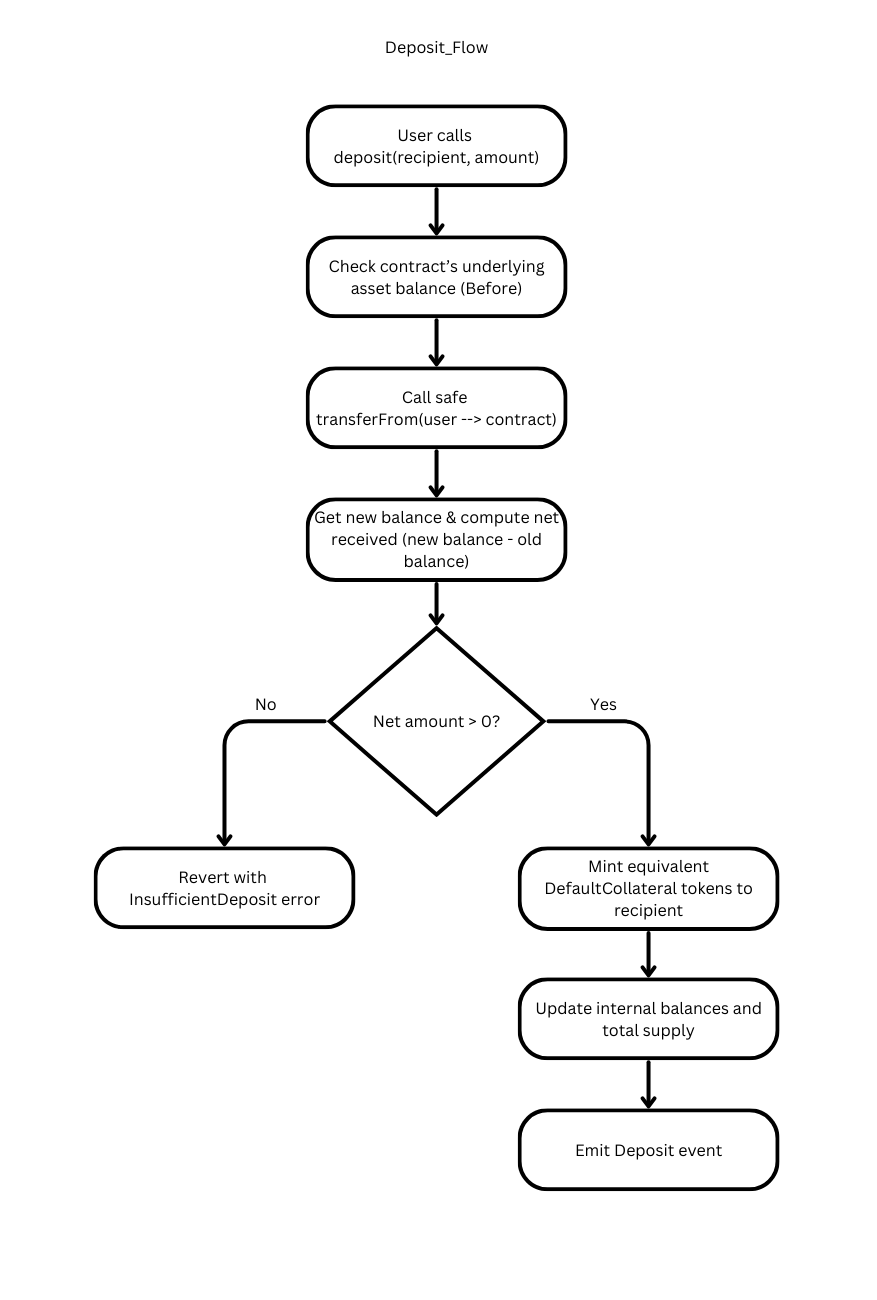

**Withdraw Function**

The withdraw function allows a user to redeem their collateral tokens in order to get back the underlying asset. In doing so, the collateral tokens are burned, and the underlying asset is transferred out of the contract. The process enforces security conditions (like timelocks) and adjusts for penalties (slashing).


<u>*Functioning of withdraw*</u>

1. Input and Pre‑Withdrawal Check:
- The function is typically called with a recipient address and the amount of the underlying asset that the user wishes to withdraw.
- The very first check is that the withdrawal amount is non‑zero. If the amount is zero, the function reverts (with an “InsufficientWithdraw” error).

2. Burning Collateral Tokens:

- To “unwind” the collateral position, the contract burns the amount of collateral tokens corresponding to the withdrawal. This reduces the caller’s balance and the overall total supply of the collateral token.
- This burning mechanism helps track how much collateral remains in the system and ensures that each token is fully backed by an equivalent amount of the underlying asset.

3. Transferring the Underlying Asset:

- After burning the collateral tokens, the function uses a safe transfer (using SafeERC20) to send the underlying asset from the collateral contract back to the recipient.
- This completes the redemption process: the user’s collateral tokens have been “exchanged” back for the underlying asset.

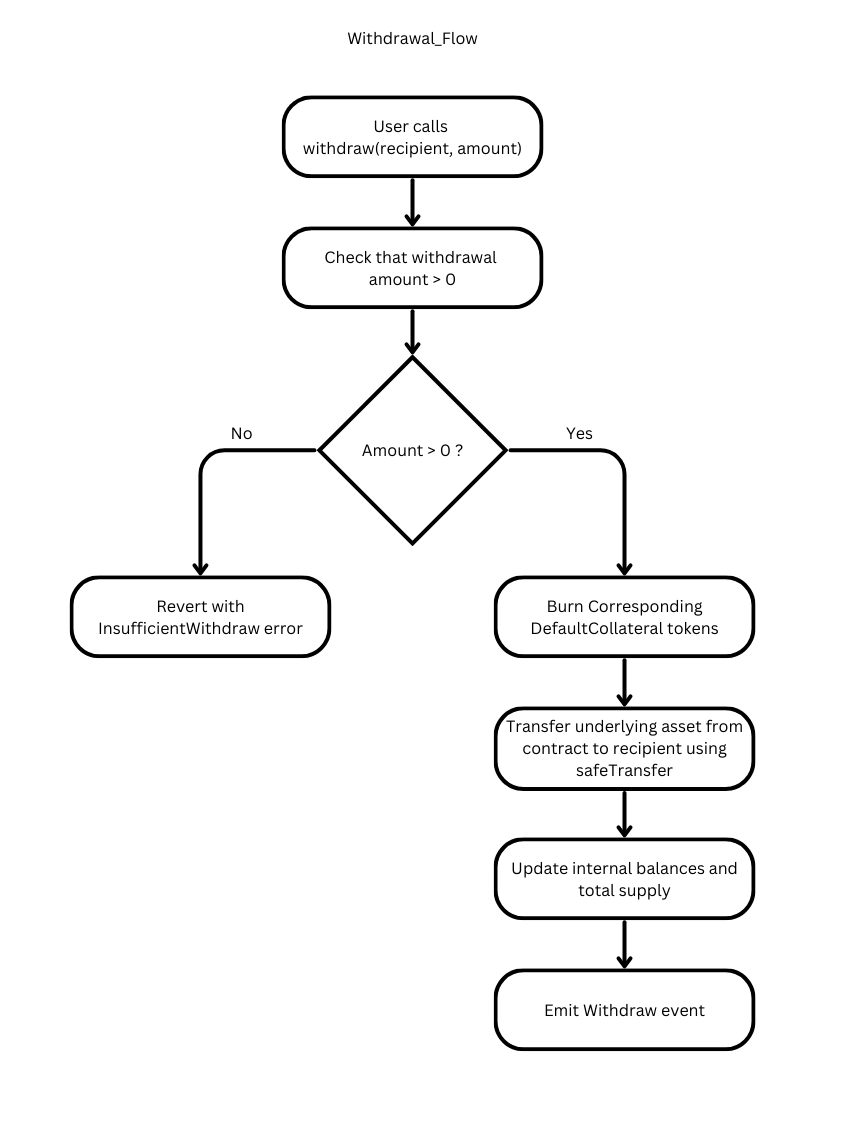